# Unit 4 Project
After understanding how neural networks work, implementing some basic architectures using deep learning frameworks, and learning about some advanced techniques to help enhance our neural networks' models results, it's time to apply what you learned! So let's start

## Project Overview 
In this project, you will build a neural network model to classify images from CIFAR 10 dataset. 

The CIFAR-10 dataset consists of 60000 32x32 color images of 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. [source](https://www.cs.toronto.edu/~kriz/cifar.html)

Unlike the previous projects, there will be no code cells to fill, the only task you have is to build the best possible model using the techniques you learned about in this unit. But we will guide you with some directives.

You will have enough guidance throughout the project and your work will be reviewed and graded by a teacher assistant. You can also reach out to the TA via slack whenever you feel you are stuck.

## Some guidelines
- Please use text cells to write the questions' answers in a good way.
- Don't forget to save the different models you tested so you will be able to report the different results you got and the impact of the different techniques you tested later.

## Getting started
- In case you don't have a GPU, it is recommended that you use google colab. Start by cloning this repository, then open [google colab](https://colab.research.google.com/), click on File > Upload notebook, and finally upload the ```.ipynb``` file from the repository you have just cloned! Don't forget to change the runtime to GPU. If you want to work in your local environment just open it using jupyter notebook.



## Dataset 

1.   Load the dataset (**hint**: it's available here https://keras.io/api/datasets/)
2.   Display few images of each class.



In [6]:
# Your code here
import tensorflow as tf 
from tensorflow import keras 
import numpy as np

(image_train, lable_train),(image_test, lable_test) = keras.datasets.cifar10.load_data()
lable_train = keras.utils.to_categorical(lable_train, 10)
lable_test = keras.utils.to_categorical(lable_test, 10)


print(image_train.shape)
print(lable_train.shape)
print(image_test.shape)
print(lable_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


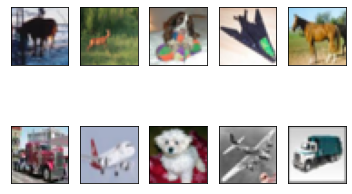

In [7]:
import matplotlib.pyplot as plt
#60000 32x32 color images of 10 classes, with 6000 
for i in range(0,10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image_test[np.argmax(image_test==i)])
plt.show()

## Baseline Model

1.   Build a basline model using only dense layers, activation function of your choice, and the adapted cost function for this problem.
2.   Train and evaluate your model
3.   Analyze the result



In [49]:
# Your code here
from tensorflow.keras import layers

def Model():
    layers_1 = layers.Flatten(input_shape = (32,32,3))
    layers_2 = layers.Dense(100,activation="tanh",kernel_initializer="glorot_normal")
    layers_3 = layers.Dense(150,activation="tanh")
    layers_4 = layers.Dense(10,activation="softmax")
    return keras.Sequential([layers_1,layers_2,layers_3,layers_4])

In [50]:
BaselineModel = Model()

BaselineModel.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  
   optimizer = "adam", metrics = ["accuracy"])
train = BaselineModel.fit(image_train,lable_train,epochs = 50,verbose = 0)
test = BaselineModel.evaluate(image_test,lable_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3124 - accuracy: 0.1000


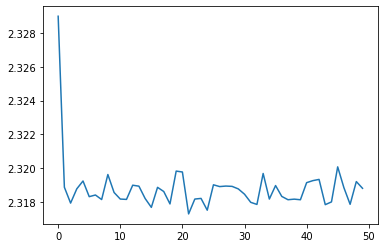

In [51]:
plt.plot(train.history['loss'])
plt.show()

#we notice that the training took quite long time 
#and it is overfitting (irregular low loss curve low accuracy on the testing sample) which means the model have a high variance 
#and needs regularization

## Accelerating the training

1.   Add batch normalization layers to your network in order to accelerate the training. Start with adding batch norm layer before each of your activation layers.
2.   Analyze the new results
3.   Change the position of the batch norm layers so they will be after the activation layers. Compare the results.
   



In [217]:
# Your code here
def Model_1():
    #after activation layers
    layers_1 = layers.Flatten(input_shape = (32,32,3))
    Bn = layers.BatchNormalization()
    layers_2 = layers.Dense(100,activation="tanh",kernel_initializer="glorot_normal")
    layers_3 = layers.Dense(100,activation="tanh")
    layers_4 = layers.Dense(10,activation="softmax")
    return keras.Sequential([layers_1,layers_2,Bn,layers_3,Bn,layers_4])

In [218]:
model_1 = Model_1()

model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  
   optimizer = "adam", metrics = ["accuracy"])
train2 = model_1.fit(image_train,lable_train,epochs = 50,verbose = 0)
test2 = model_1.evaluate(image_test,lable_test)

313/313 [==============================] - 0s 938us/step - loss: 4.0027 - accuracy: 0.1000


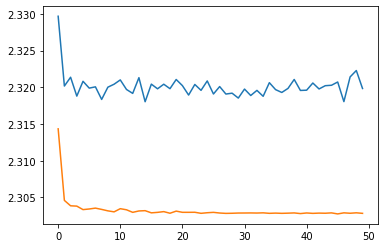

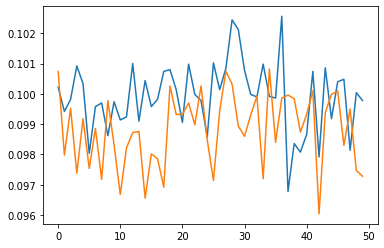

In [219]:
plt.plot(train.history['loss'])
plt.plot(train2.history['loss'])
plt.show()
plt.plot(train.history['accuracy'])
plt.plot(train2.history['accuracy'])
plt.show()

#we can see that the model is slightly doing better (more stable loss graph, the accuracy droped a little bit)
#but its still overfitting and have poor results when it comes to the testing set

In [221]:
#before activation layers
def Model_2():
    layers_1 = layers.Flatten(input_shape = (32,32,3))
    Bn = layers.BatchNormalization()
    layers_2 = layers.Dense(100,activation="tanh",kernel_initializer="glorot_normal")
    layers_3 = layers.Dense(150,activation="tanh")
    layers_4 = layers.Dense(10,activation="softmax")
    return keras.Sequential([Bn,layers_1,layers_2,Bn,layers_3,Bn,layers_4])

model_2 = Model_2()

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  
   optimizer = "adam", metrics = ["accuracy"])
train3 = model_2.fit(image_train,lable_train,epochs = 50,verbose = 0)
test3 = model_2.evaluate(image_test,lable_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5003 - accuracy: 0.4792


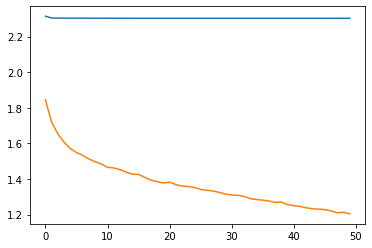

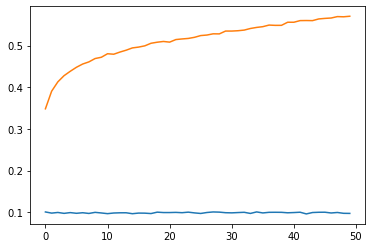

In [222]:
plt.plot(train2.history['loss'])
plt.plot(train3.history['loss'])
plt.show()
plt.plot(train2.history['accuracy'])
plt.plot(train3.history['accuracy'])
plt.show()

#we notice that the results are better than befor (orange graphs)
#when the regulazation layers are befor the activation layers 
#because the first example only the outputs of the 3rd and 2nd layers were regulazed
#but in this model each time a layer output data it get regulazed
#and the accuracy is still low 

## Reducing the overfitting 


1.   Apply the dropout technique to reduce the overfitting your model is suffering from
2.   Try different dropout rates 



In [234]:
# Your code here
def Model_3():
    layers_1 = layers.Flatten(input_shape = (32,32,3))
    Bn = layers.BatchNormalization()
    Dp = layers.Dropout(.9)
    layers_2 = layers.Dense(100,activation="tanh",kernel_initializer="glorot_normal")
    layers_3 = layers.Dense(150,activation="tanh")
    layers_4 = layers.Dense(10,activation="softmax")
    return keras.Sequential([Bn,Dp,layers_1,layers_2,Bn,Dp,layers_3,Bn,Dp,layers_4])

model_3 = Model_2()

model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  
   optimizer = "adam", metrics = ["accuracy"])
train4 = model_3.fit(image_train,lable_train,epochs = 50,verbose = 0)
test4 = model_3.evaluate(image_test,lable_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.4876 - accuracy: 0.4883


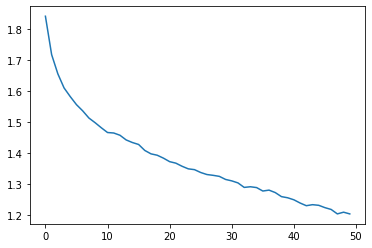

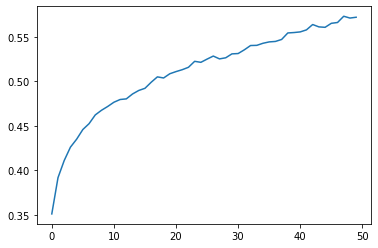

In [235]:
plt.plot(train4.history['loss'])
plt.show()
plt.plot(train4.history['accuracy'])
plt.show()


## Trying different model's parameters
1. Try changing the number of layers, the number of hidden neurons in each layer, the activation functions, the weight initialization method...
2. Compare the results you got for each evaluated model.

In [253]:
# Your code here

#change initialazation method 
#add another layer for total of 4 hidden layer 
#change nodes number 
Model_1 = keras.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.BatchNormalization(),
    layers.Dropout(.9),
    layers.Dense(200,kernel_initializer="HeNormal"),
    layers.BatchNormalization(),
    layers.Dropout(.9),
    layers.Dense(150,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(.9),
    layers.Dense(50,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(.9),
    layers.Dense(20,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(.9),
    layers.Dense(10,activation="softmax")
])


Model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  
   optimizer = "adam", metrics = ["accuracy"])
history_1 = Model_1.fit(image_train,lable_train,epochs = 50,verbose = 0)
testing_1 = Model_1.evaluate(image_test,lable_test)


313/313 [==============================] - 1s 2ms/step - loss: 2.0801 - accuracy: 0.1913


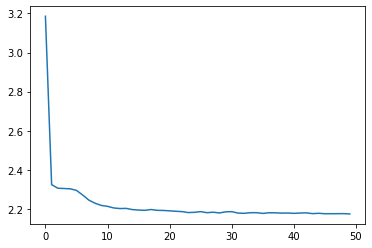

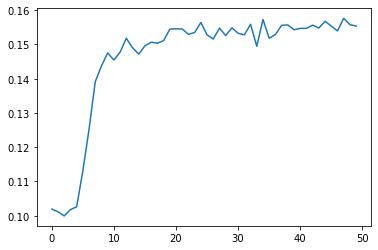

In [255]:
plt.plot(history_1.history['accuracy'])
plt.show()
#adding more layers caused the accuracy to drop  (maybe more complexity with this amout of data caused overfitting)

In [8]:
#change optimizer
#change activation function 
#adding bias
#adding more epochs 
#changing Dropout rate

def Model_5():
    layers_1 = layers.Flatten(input_shape = (32,32,3))
    Bn = layers.BatchNormalization()
    Dp = layers.Dropout(.5)
    layers_2 = layers.Dense(100,activation="tanh",kernel_initializer=keras.initializers.GlorotNormal(),use_bias=True ,bias_initializer="zeros")
    layers_3 = layers.Dense(150,activation="tanh")
    layers_4 = layers.Dense(10,activation="softmax")
    return keras.Sequential([Bn,Dp,layers_1,layers_2,Bn,Dp,layers_3,Bn,Dp,layers_4])

Model_2 = Model_5()


Model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  
   optimizer = "adam", metrics = ["accuracy"])
history_2 = Model_2.fit(image_train,lable_train,epochs = 95,verbose = 0)
testing_2 = Model_2.evaluate(image_test,lable_test)


313/313 [==============================] - 1s 1ms/step - loss: 1.4559 - accuracy: 0.5155


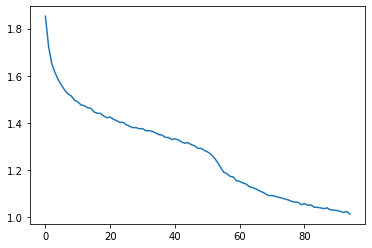

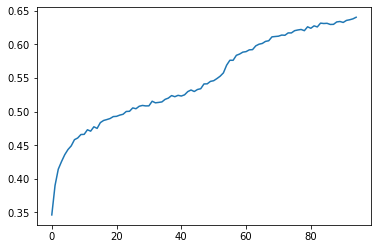

In [9]:
plt.plot(history_2.history['loss'])
plt.show()
plt.plot(history_2.history['accuracy'])
plt.show()

## Few more experiments to go

1.   **Exploring more regularization techniques:** Try at least 2 regularization techniques separately and combined.  A non-exhaustive list of regularization techniques you can test


> * L1 and L2 regularization
* Early stopping
* Data augmentation
* Decreasing the complexity of the model

2.   **Hyperparameters' tuning:** Try to tune the learning parameters using the tuning strategies we learned about:

> * Learning rate
* Mini-batch size
* The optimizer and its parameters

3. Analyze the impact of each of the applied techniques. What were the most effective ones? What were the hypeparameters that affects the results the most?


313/313 [==============================] - 1s 1ms/step - loss: 1.4764 - accuracy: 0.5105


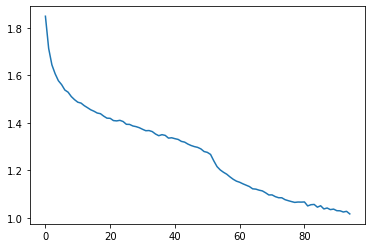

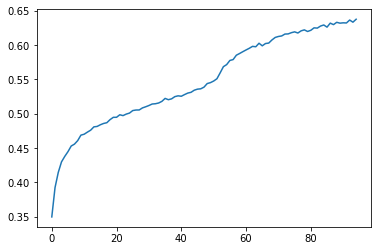

In [11]:
#Early stopping

def Model_6():
    layers_1 = layers.Flatten(input_shape = (32,32,3))
    Bn = layers.BatchNormalization()
    Dp = layers.Dropout(.5)
    layers_2 = layers.Dense(100,activation="tanh",kernel_initializer=keras.initializers.GlorotNormal(),use_bias=True ,bias_initializer="zeros")
    layers_3 = layers.Dense(150,activation="tanh"
    layers_4 = layers.Dense(10,activation="softmax")
    return keras.Sequential([Bn,Dp,layers_1,layers_2,Bn,Dp,layers_3,Bn,Dp,layers_4])

Model_6 = Model_6()


Model_6.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  
   optimizer = "adam", metrics = ["accuracy"])
history_6 = Model_6.fit(image_train,lable_train,epochs = 95,verbose = 0,callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5) )
testing_6 = Model_6.evaluate(image_test,lable_test)


plt.plot(history_6.history['loss'])
plt.show()
plt.plot(history_6.history['accuracy'])
plt.show()

#the early topping did not affect the model's preformence in a great deal probably because the volum of the bumps
# in he graph is not great but as epochs goes up the preformence gets better and stopping it early will be of opposite effect

313/313 [==============================] - 1s 1ms/step - loss: 1.7129 - accuracy: 0.4859


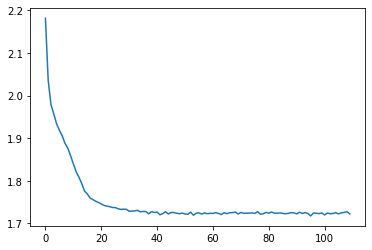

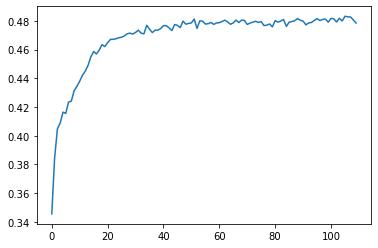

In [36]:
#L2 regularization
def Model_7():
    layers_1 = layers.Flatten(input_shape = (32,32,3))
    Bn = layers.BatchNormalization()
    Dp = layers.Dropout(.5)
    layers_2 = layers.Dense(100,activation="tanh",kernel_regularizer = keras.regularizers.l2(.001),kernel_initializer=keras.initializers.GlorotNormal(),use_bias=True ,bias_initializer="zeros")
    layers_3 = layers.Dense(150,activation="tanh",kernel_regularizer = keras.regularizers.l2(.001))
    layers_4 = layers.Dense(10,activation="softmax",kernel_regularizer = keras.regularizers.l2(.001))
    return keras.Sequential([Bn,Dp,layers_1,layers_2,Bn,Dp,layers_3,Bn,Dp,layers_4])

Model_7 = Model_7()


Model_7.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  
   optimizer = "adam", metrics = ["accuracy"])
history_7 = Model_7.fit(image_train,lable_train,epochs = 110,verbose=0)
testing_7 = Model_7.evaluate(image_test,lable_test)


plt.plot(history_7.history['loss'])
plt.show()
plt.plot(history_7.history['accuracy'])
plt.show()

#both l1 and l2 had a bad effect in the models preformance 


313/313 [==============================] - 1s 2ms/step - loss: 1.8694 - accuracy: 0.4829


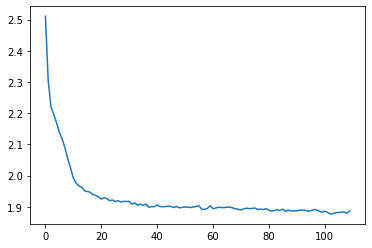

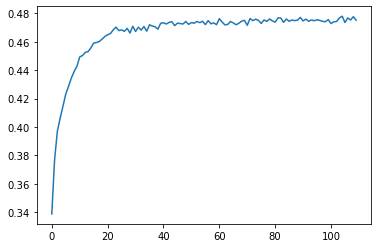

In [46]:
#Decreasing the complexity of the model & Early stopping
#chaning the patience to 50 epoch
#use_bias was set to false and using only 1 hidden layers
def Model_8():
    layers_1 = layers.Flatten(input_shape = (32,32,3))
    Bn = layers.BatchNormalization()
    Dp = layers.Dropout(.5)
    layers_2 = layers.Dense(100,activation="tanh",kernel_regularizer = keras.regularizers.l1(.0001),kernel_initializer=keras.initializers.GlorotNormal(),use_bias=False)
    layers_4 = layers.Dense(10,activation="softmax",kernel_regularizer = keras.regularizers.l1(.0001))
    return keras.Sequential([Bn,Dp,layers_1,layers_2,Bn,Dp,layers_4])

Model_8 = Model_8()


Model_8.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  
   optimizer = "adam", metrics = ["accuracy"])
history_8 = Model_8.fit(image_train,lable_train,epochs = 110,verbose = 0,callbacks = keras.callbacks.EarlyStopping(monitor='loss', patience=50) )
testing_8 = Model_8.evaluate(image_test,lable_test)


plt.plot(history_8.history['loss'])
plt.show()
plt.plot(history_8.history['accuracy'])
plt.show()

#we can see the the preformence droped mainly because of the early stopping 

313/313 [==============================] - 1s 2ms/step - loss: 1.3906 - accuracy: 0.5224


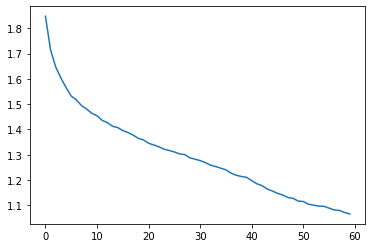

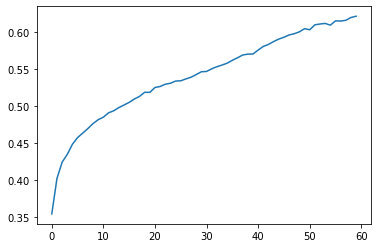

In [62]:
#tunning parameters
# Mini-batch size and Learning Rate 
# decrease epochs 

def Model_9():
    layers_1 = layers.Flatten(input_shape = (32,32,3))
    Bn = layers.BatchNormalization()
    Dp = layers.Dropout(.5)
    layers_2 = layers.Dense(150,activation="tanh",kernel_initializer=keras.initializers.GlorotNormal())
    layers_3 = layers.Dense(50,activation="tanh")
    layers_4 = layers.Dense(10,activation="softmax")
    return keras.Sequential([Bn,Dp,layers_1,layers_2,Bn,Dp,layers_3,Bn,Dp,layers_4])

Model_9 = Model_9()

lr = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)

Model_9.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  
   optimizer = tf.keras.optimizers.Adam(lr) , metrics = ["accuracy"])
history_9 = Model_9.fit(image_train,lable_train,epochs = 60,batch_size=100,callbacks = keras.callbacks.EarlyStopping(monitor='loss', patience=50) )
testing_9 = Model_9.evaluate(image_test,lable_test)


plt.plot(history_9.history['loss'])
plt.show()
plt.plot(history_9.history['accuracy'])
plt.show()

## Answer the following questions
*Hint: Do your own research to answer these questions, none of the questions is answered in the previous lessons*


1.   Why we can’t reach a good accuracy on this task?
2.   Explain why fully connected neural networks are Not efficient on image tasks
3.   What architecture can be used  for such tasks? Why they are more adapted for that?



In [ ]:
# Q 1 and 2 ==> we can't reach good accuracy because the images are big in size (in this case 3072 (32*32*3) ) 
# witch mean that there is 3072 node in the unput layer, hense there will a great amount of parameters and the amount gets greater eatch time the node 
# connect with the other node in the previous layer witch leads to a complex model 
# hense the model will start memorizing the given data instead of learning witch lead to overfitting.(in addition to the other 
# unconveniences such as the background in images )
# fully connected neural networks are not efficient on image tasks because 
# Q 3 ==> the perfect architecture would be CNN because it preforms a set of filters such as pooling witch lessen the
# comlexity of images moreover it works with portions instead of the whole image.